<a href="https://colab.research.google.com/github/thalicsouza/cs_go_analysis/blob/main/GC_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalação inicial do pycaret
!pip install pycaret

In [ ]:
# inicialização do pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# carregando pacotes
import pandas as pd
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# upload da base
from google.colab import files
uploaded = files.upload()

Saving abt.xlsx to abt (2).xlsx


In [ ]:
# fazendo a leitura da base
df = pd.read_excel('abt.xlsx')
df

,player_id,matches_played,win_rate,total_wins,total_loss,mm_points,kills,death,assist,hs,kill_per_match,death_per_match,assist_per_match,hs_rate,max_date,dt_cadastro,min_date,tempo_cadastro,target
0,002f9e81d3fb7cf95627d630e9185f07,5,1,5,0,15,104,85,29,18,20,17,5,0.0,2020-02-02,2019-11-10,2020-01-31,84,1
1,00a331676ace55f29893d9a5419cbc00,1,0,0,1,-1,13,19,10,4,13,19,10,0.0,2020-01-05,2019-12-25,2020-01-05,11,0
2,00e79e2783b31f4f7a5b2542f3c265d0,10,0,4,6,5,174,182,48,54,17,18,4,0.0,2020-02-24,2019-11-23,2020-01-24,93,1
3,01351afe1fc05e6286c9bab31bc5f2d6,5,0,2,3,3,96,121,26,36,19,24,5,0.0,2020-02-15,2019-12-28,2020-02-15,49,1
4,01428405ea6c8fed620fca2d0eddea06,5,0,2,3,2,97,88,22,33,19,17,4,0.0,2020-02-27,2019-11-21,2020-01-31,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,feaba85b4b43b5f1a0cd47fa1363dfb0,1,0,0,1,-1,14,19,3,8,14,19,3,0.0,2020-01-16,2019-12-01,2020-01-16,46,0
846,feade62df687595a562cf45cbf341dc7,5,0,3,2,7,94,73,15,46,18,14,3,0.0,2020-02-03,2019-12-16,2020-01-31,49,1
847,ff20d9f9772f2e9cc9b54c1f717fd60f,1,0,0,1,-1,12,21,4,5,12,21,4,0.0,2020-01-16,2019-11-01,2020-01-16,76,0
848,ff3d843ef6014a61dfa68e4e20743155,16,0,4,12,-2,361,306,54,133,22,19,3,0.0,2020-01-30,2019-11-14,2020-01-30,77,0


In [ ]:
# distribuição das classes
df.groupby('target')['player_id'].count()

target
0    373
1    477
Name: player_id, dtype: int64

In [ ]:
# distribuição das classes
df.groupby('target')['player_id'].count()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
matches_played,850.0,8.087059,15.381813,1.0,1.0,3.0,8.00,166.0
win_rate,850.0,0.151765,0.359004,0.0,0.0,0.0,0.00,1.0
total_wins,850.0,3.709412,7.139138,0.0,0.0,1.0,4.00,72.0
total_loss,850.0,4.369412,8.588074,0.0,1.0,1.0,4.00,94.0
mm_points,850.0,6.329412,13.507742,-12.0,-1.0,2.0,7.00,127.0
kills,850.0,136.649412,265.442386,0.0,16.0,38.0,129.75,3108.0
death,850.0,147.451765,295.625142,0.0,19.0,43.0,137.50,3219.0
assist,850.0,30.770588,63.436234,0.0,4.0,9.0,28.00,876.0
hs,850.0,49.589412,98.944701,0.0,5.0,13.0,49.75,1429.0
kill_per_match,850.0,14.872941,6.740546,0.0,10.0,15.0,19.00,45.0


In [ ]:
# removendo colunas desnecessárias do dataset
df = df[['matches_played','total_wins','total_loss','mm_points','kills','death','assist',
         'hs','kill_per_match','death_per_match','assist_per_match','tempo_cadastro','target']]
df

,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs,kill_per_match,death_per_match,assist_per_match,tempo_cadastro,target
0,5,5,0,15,104,85,29,18,20,17,5,84,1
1,1,0,1,-1,13,19,10,4,13,19,10,11,0
2,10,4,6,5,174,182,48,54,17,18,4,93,1
3,5,2,3,3,96,121,26,36,19,24,5,49,1
4,5,2,3,2,97,88,22,33,19,17,4,98,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1,0,1,-1,14,19,3,8,14,19,3,46,0
846,5,3,2,7,94,73,15,46,18,14,3,49,1
847,1,0,1,-1,12,21,4,5,12,21,4,76,0
848,16,4,12,-2,361,306,54,133,22,19,3,77,0


In [ ]:
# verificando a quantidade de linhas e colunas da base
df.shape

(850, 13)

In [ ]:
# informações sobre os tipos de dados e presença de nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   matches_played    850 non-null    int64
 1   total_wins        850 non-null    int64
 2   total_loss        850 non-null    int64
 3   mm_points         850 non-null    int64
 4   kills             850 non-null    int64
 5   death             850 non-null    int64
 6   assist            850 non-null    int64
 7   hs                850 non-null    int64
 8   kill_per_match    850 non-null    int64
 9   death_per_match   850 non-null    int64
 10  assist_per_match  850 non-null    int64
 11  tempo_cadastro    850 non-null    int64
 12  target            850 non-null    int64
dtypes: int64(13)
memory usage: 86.5 KB


In [ ]:
# inserindo 0 para substituir nulos
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

matches_played      0
total_wins          0
total_loss          0
mm_points           0
kills               0
death               0
assist              0
hs                  0
kill_per_match      0
death_per_match     0
assist_per_match    0
tempo_cadastro      0
target              0
dtype: int64

In [ ]:
# separando as bases em treino e teste
data = df.sample(frac=0.85, random_state=42)
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Dados de treino: ' + str(data.shape))
print('Dados de teste: ' + str(data_unseen.shape))

Data for Modeling: (722, 13)
Unseen Data For Predictions: (128, 13)


In [ ]:
# importando o módulo de classificação do pycaret
from pycaret.classification import *

In [ ]:
 # criando a configuração de preparação dos dados
 data_prep = setup(data = data, target = 'target')

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(722, 13)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# verificando qual o modelo com melhor desempenho para esse dataset
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7524,0.8292,0.8267,0.7619,0.7919,0.4876,0.4926,0.127
lda,Linear Discriminant Analysis,0.7424,0.8268,0.7916,0.7661,0.7777,0.4711,0.4734,0.018
lr,Logistic Regression,0.7385,0.8281,0.7953,0.7596,0.7761,0.4619,0.4646,0.286
ridge,Ridge Classifier,0.7384,0.0000,0.7916,0.7613,0.7752,0.4623,0.4648,0.016
rf,Random Forest Classifier,0.7347,0.8020,0.8026,0.7514,0.7749,0.4525,0.4563,0.517
lightgbm,Light Gradient Boosting Machine,0.7287,0.8113,0.7887,0.7496,0.7677,0.4418,0.4443,0.049
ada,Ada Boost Classifier,0.7188,0.8009,0.7642,0.7518,0.7553,0.4240,0.4293,0.111
et,Extra Trees Classifier,0.7068,0.7839,0.7743,0.7309,0.7505,0.3952,0.3986,0.462
knn,K Neighbors Classifier,0.6810,0.7606,0.7567,0.7089,0.7305,0.3401,0.3431,0.117
dt,Decision Tree Classifier,0.6770,0.6721,0.7086,0.7239,0.7144,0.3426,0.3451,0.018


In [ ]:
# exibindo o melhor modelo e seus parâmetros
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# criando e instaciando o melhor modelo
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7843,0.8370,0.8966,0.7647,0.8254,0.5479,0.5599
1,0.7059,0.8370,0.7931,0.7188,0.7541,0.3904,0.3934
2,0.7059,0.8292,0.7586,0.7333,0.7458,0.3972,0.3975
3,0.7843,0.8276,0.8276,0.8000,0.8136,0.5579,0.5584
4,0.8039,0.8636,0.8276,0.8276,0.8276,0.6003,0.6003
5,0.6600,0.6617,0.7586,0.6875,0.7213,0.2881,0.2904
6,0.8000,0.9163,0.8966,0.7879,0.8387,0.5784,0.5868
7,0.7600,0.8489,0.7586,0.8148,0.7857,0.5138,0.5155
8,0.7800,0.8279,0.8929,0.7576,0.8197,0.5424,0.5546
9,0.7400,0.8425,0.8571,0.7273,0.7869,0.4592,0.4695


In [ ]:
# fazendo o armazenamento do modelo com ajuste dos hiperparâmetros na variável tuned_gbc
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8039,0.8166,0.9310,0.7714,0.8438,0.5867,0.6056
1,0.7255,0.8166,0.8621,0.7143,0.7813,0.4214,0.4350
2,0.7255,0.8229,0.8621,0.7143,0.7813,0.4214,0.4350
3,0.8039,0.8542,0.8621,0.8065,0.8333,0.5959,0.5978
4,0.8039,0.8918,0.8966,0.7879,0.8387,0.5913,0.5994
5,0.6400,0.6388,0.7931,0.6571,0.7188,0.2308,0.2388
6,0.8600,0.9212,0.9655,0.8235,0.8889,0.7029,0.7193
7,0.7400,0.8703,0.7931,0.7667,0.7797,0.4628,0.4632
8,0.7400,0.7549,0.9286,0.7027,0.8000,0.4482,0.4850
9,0.7200,0.8263,0.8571,0.7059,0.7742,0.4147,0.4284


In [ ]:
# exibindo o modelo tunado e seus parâmetros
print(tuned_gbc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=7,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.05, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=140,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.35, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


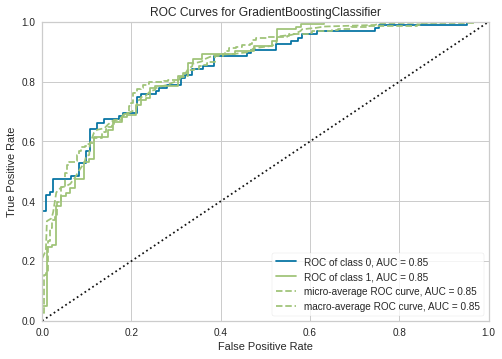

In [ ]:
# exibindo o gráfico da curva ROC
plot_model(tuned_gbc, plot = 'auc')

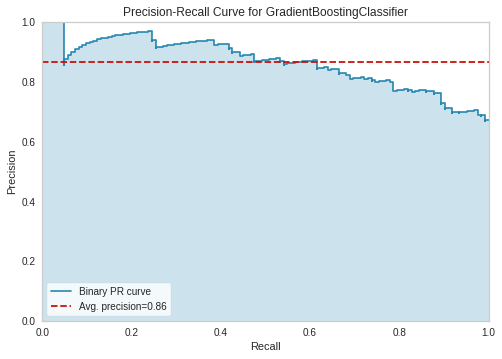

In [ ]:
# exibindo o gráfico de trade off entre precision e recall
plot_model(tuned_gbc, plot = 'pr')

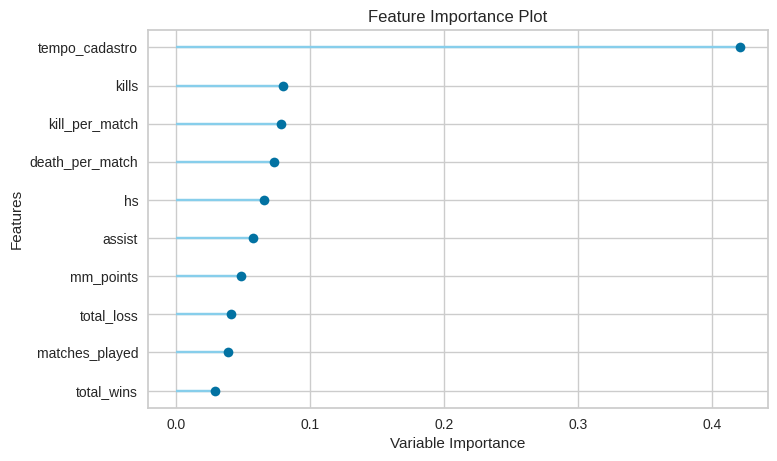

In [ ]:
# exibindo o gráfico das variáveis mais importantes
plot_model(tuned_gbc, plot = 'feature')

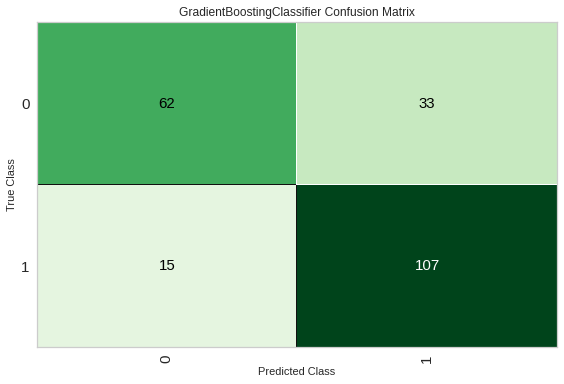

In [ ]:
# exibindo o gráfico de matriz de confusão
plot_model(tuned_gbc, plot = 'confusion_matrix')

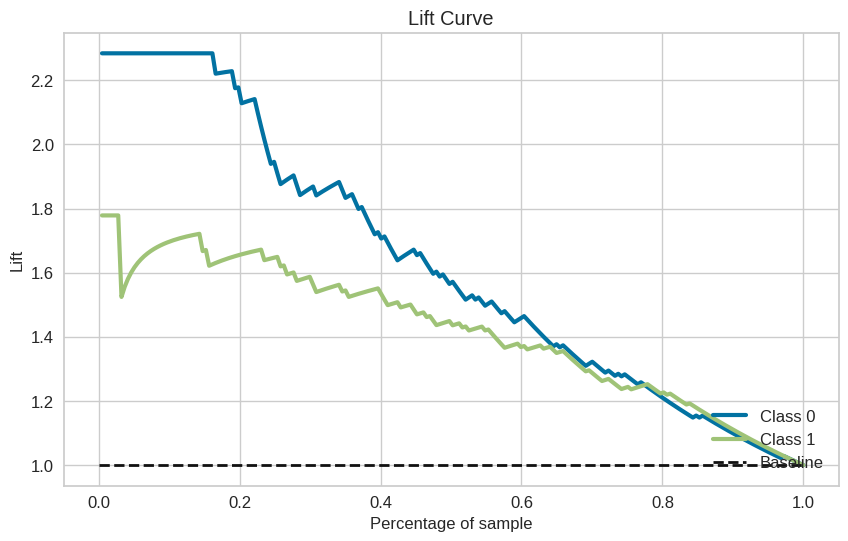

In [ ]:
# exibindo o gráfico de lift
plot_model(tuned_gbc, plot = 'lift')

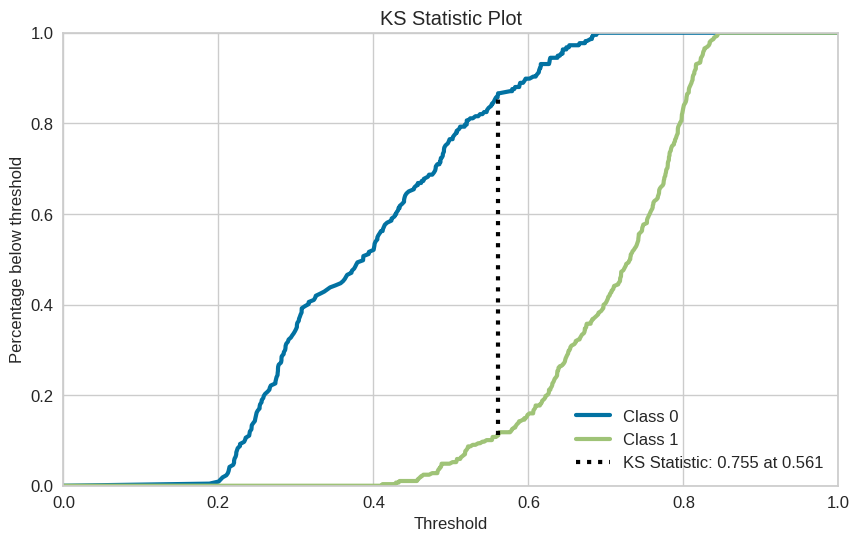

In [ ]:
# exibindo o gráfico de lift
plot_model(tuned_gbc, plot = 'ks')

In [ ]:
# analisando outras métricas de validação do modelo
evaluate_model(tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# fazendo a previsão na base de validação
predict_model(tuned_gbc);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7788,0.8485,0.877,0.7643,0.8168,0.541,0.5492


In [ ]:
# fazendo o scoring da base
val_predictions = predict_model(tuned_gbc, data=data_unseen)
val_predictions['player_id'] = df['player_id']
val_predictions.head(50)

,matches_played,total_wins,total_loss,mm_points,kills,death,assist,hs,kill_per_match,death_per_match,assist_per_match,tempo_cadastro,target,Label,Score,player_id
0,1,0,1,-1,13,19,10,4,13,19,10,11,0,0,0.7149,002f9e81d3fb7cf95627d630e9185f07
1,18,7,11,7,247,308,63,78,13,17,3,44,0,0,0.7075,00a331676ace55f29893d9a5419cbc00
2,1,0,1,-1,20,20,7,11,20,20,7,79,1,1,0.6562,00e79e2783b31f4f7a5b2542f3c265d0
3,4,1,3,0,22,63,15,8,5,15,3,68,1,0,0.5206,01351afe1fc05e6286c9bab31bc5f2d6
4,7,3,4,1,106,84,21,39,15,12,3,42,0,0,0.7179,01428405ea6c8fed620fca2d0eddea06
5,2,1,1,2,3,6,3,1,1,3,1,80,0,1,0.7102,01647123687507ffabe35257d673f3e9
6,1,1,0,3,15,15,3,5,15,15,3,54,0,1,0.5300,019bbc9dfcd4800f0b2a3e6407b59d9b
7,1,0,1,-1,2,4,0,0,2,4,0,44,0,1,0.6357,0201d985f288a47c46943ff433f71b6c
8,40,20,20,38,710,747,154,251,17,18,3,81,1,1,0.6471,0218fef045a11bd4d2c9122a8fb63a45
9,1,0,1,-1,31,31,7,12,31,31,7,38,0,0,0.7142,02998dd6b7f6c7f11515d35368f20a52


In [ ]:
# salvando o arquivo com as predições 
val_predictions.to_csv('val_predictions.csv',index = False)
print("OK!")

OK!


In [ ]:
# verificando a métrica da AUC na minha base de validação
from pycaret.utils import check_metric
check_metric(val_predictions['target'], val_predictions['Label'], metric = 'AUC')

0.7518

In [ ]:
# salvando o modelo final
save_model(tuned_gbc,'Final_GradientBoosting_Classifier_jul21')
print('Modelo salvo com sucesso! :D')

Transformation Pipeline and Model Successfully Saved
Modelo salvo com sucesso! :D
